In [1]:
####---- Importing the required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv('C:/Users/hp/Desktop/ML projects/predictive maintenance classification/predictive_maintenance.csv')

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
def preprocessing(df):
    columns=df.shape[1]
    print('The total columns in dataset are : ',columns)
    rows=df.shape[0]
    print('The total raws are in dataset are : ',rows)
    missing_num=df.isnull().sum()
    print('The total missing values in dataset are :\n',missing_num)
    data_types=df.dtypes
    print('The data tyes in dataset are :\n',data_types)
    return df

In [5]:
preprocessing(df)

The total columns in dataset are :  10
The total raws are in dataset are :  10000
The total missing values in dataset are :
 UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64
The data tyes in dataset are :
 UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UDI,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
Product ID,10000,10000,M14860,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10000,3,L,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air temperature [K],10000.0,NaN,NaN,NaN,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature [K],10000.0,NaN,NaN,NaN,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],10000.0,NaN,NaN,NaN,1538.7761,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],10000.0,NaN,NaN,NaN,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear [min],10000.0,NaN,NaN,NaN,107.951,63.654147,0.0,53.0,108.0,162.0,253.0
Target,10000.0,NaN,NaN,NaN,0.0339,0.180981,0.0,0.0,0.0,0.0,1.0
Failure Type,10000,6,No Failure,9652,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['Product ID'].value_counts()

M14860    1
L53850    1
L53843    1
L53844    1
L53845    1
         ..
M18193    1
M18194    1
L50515    1
L50516    1
M24859    1
Name: Product ID, Length: 10000, dtype: int64

In [8]:
df=df.drop(['UDI','Product ID'],axis=1)


In [9]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


In [10]:
df['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [11]:
df['Target'].value_counts()

0    9661
1     339
Name: Target, dtype: int64

In [12]:
df['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [13]:
df['Tool wear [min]'].value_counts()

0      120
2       69
5       63
7       58
59      58
      ... 
237      1
239      1
241      1
251      1
253      1
Name: Tool wear [min], Length: 246, dtype: int64

In [14]:
####---- Exploratory Data Analysis

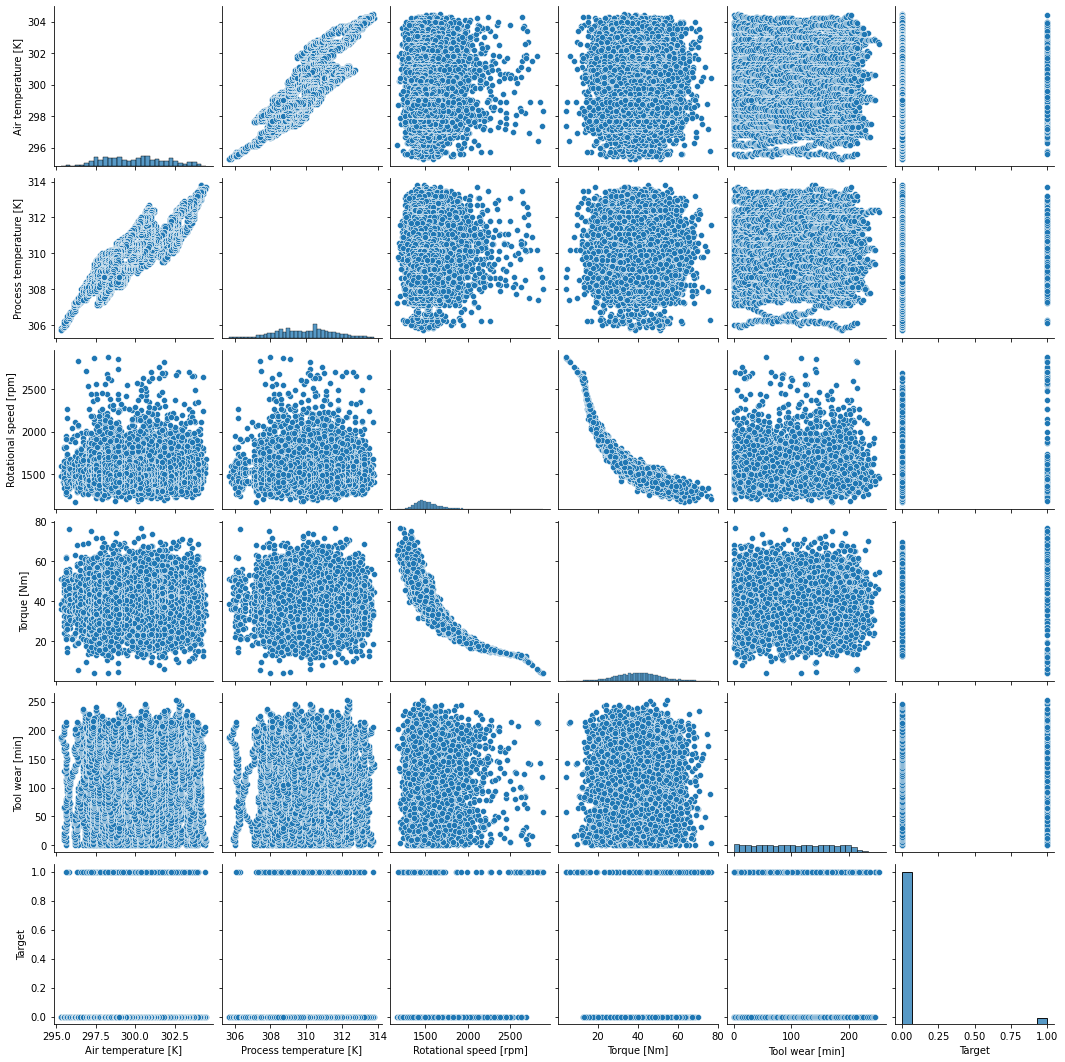

In [15]:
sns.pairplot(df)

In [16]:
####---- from pairplot we conclude that the target column is heavily imbalanced so we should consider another column 
####---- for training say (failure_type)

<AxesSubplot:xlabel='Failure Type', ylabel='count'>

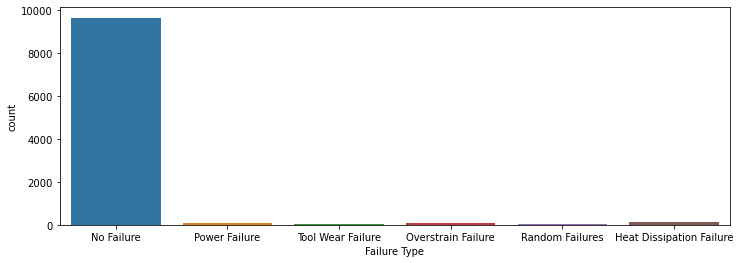

In [17]:
plt.figure(figsize=(12,4))
label_fontsize=8
sns.countplot(data=df,x='Failure Type')

In [18]:
####---- Exploring relationship between numeric columns & target column

<AxesSubplot:xlabel='Failure Type', ylabel='Air temperature [K]'>

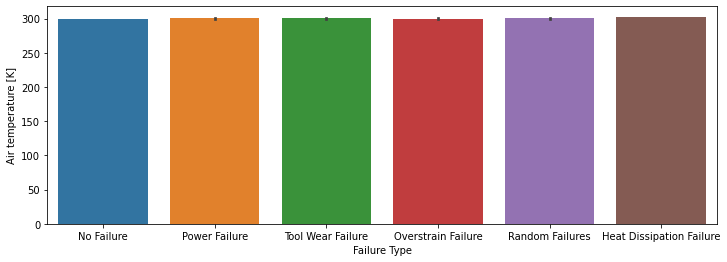

In [19]:
plt.figure(figsize=(12,4))
label_fontsize=5
sns.barplot(data=df,x='Failure Type',y='Air temperature [K]')


<AxesSubplot:xlabel='Failure Type', ylabel='Process temperature [K]'>

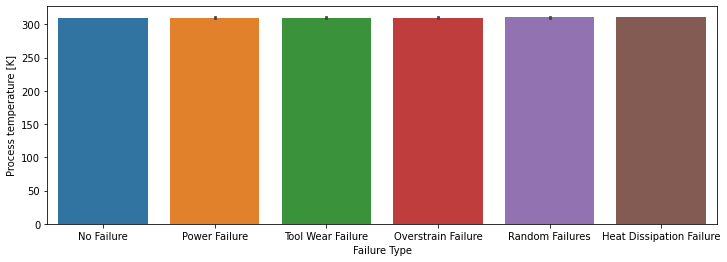

In [20]:
plt.figure(figsize=(12,4))
label_fontsize=4
sns.barplot(data=df,x='Failure Type',y='Process temperature [K]')

<AxesSubplot:xlabel='Failure Type', ylabel='Rotational speed [rpm]'>

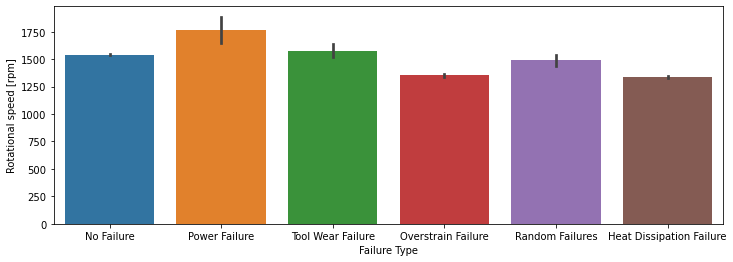

In [21]:
plt.figure(figsize=(12,4))
label_fontsize=5
sns.barplot(data=df,x='Failure Type',y='Rotational speed [rpm]')

<AxesSubplot:xlabel='Failure Type', ylabel='Torque [Nm]'>

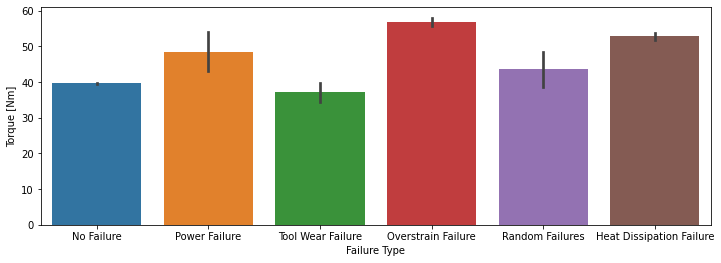

In [22]:
plt.figure(figsize=(12,4))
label_fontsize=5
sns.barplot(data=df,x='Failure Type',y='Torque [Nm]')

<AxesSubplot:xlabel='Failure Type', ylabel='Tool wear [min]'>

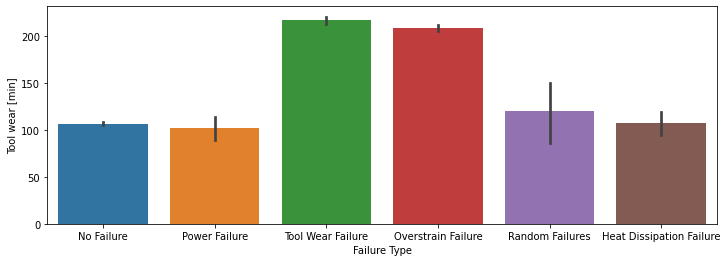

In [23]:
plt.figure(figsize=(12,4))
label_fontsize=5
sns.barplot(data=df,x='Failure Type',y='Tool wear [min]')

In [24]:
####---- from column we found that the most of failure is due type L, for better visualization, 
####---- We will also see this table on heatmap for a better visual.

In [25]:
a=df.groupby('Type')['Failure Type'].value_counts().unstack().fillna(0)
a

Failure Type,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure
Type,,,,,,
H,8,979,1,5,4,6
L,74,5757,73,59,12,25
M,30,2916,4,31,2,14


<AxesSubplot:xlabel='Failure Type', ylabel='Type'>

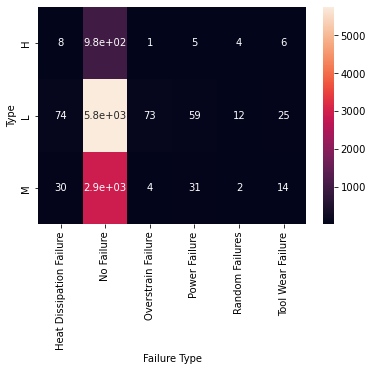

In [26]:
sns.heatmap(data=a,annot=True)

(array([ 153.,  400., 1394., 1620., 1144., 1894., 1179., 1203.,  552.,
         461.]),
 array([295.3 , 296.22, 297.14, 298.06, 298.98, 299.9 , 300.82, 301.74,
        302.66, 303.58, 304.5 ]),
 <BarContainer object of 10 artists>)

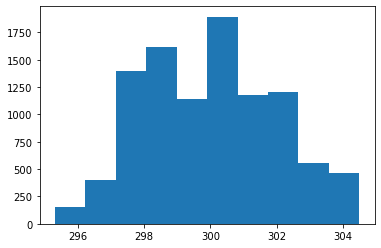

In [27]:
plt.hist(x=df['Air temperature [K]'])

(array([  98.,  123.,  843., 1655., 1692., 1724., 1944., 1141.,  528.,
         252.]),
 array([305.7 , 306.51, 307.32, 308.13, 308.94, 309.75, 310.56, 311.37,
        312.18, 312.99, 313.8 ]),
 <BarContainer object of 10 artists>)

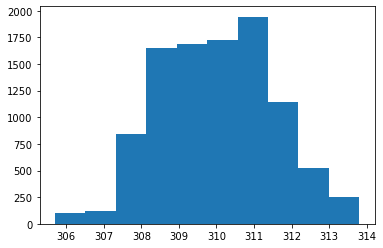

In [28]:
plt.hist(x=df['Process temperature [K]'])

(array([ 602., 4650., 3227.,  987.,  336.,  102.,   45.,   21.,   22.,
           8.]),
 array([1168. , 1339.8, 1511.6, 1683.4, 1855.2, 2027. , 2198.8, 2370.6,
        2542.4, 2714.2, 2886. ]),
 <BarContainer object of 10 artists>)

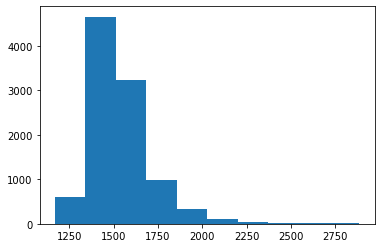

In [29]:
plt.hist(x=df['Rotational speed [rpm]'])

(array([  13.,  137.,  614., 1666., 2597., 2697., 1624.,  521.,  112.,
          19.]),
 array([ 3.8 , 11.08, 18.36, 25.64, 32.92, 40.2 , 47.48, 54.76, 62.04,
        69.32, 76.6 ]),
 <BarContainer object of 10 artists>)

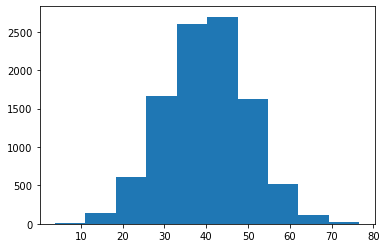

In [30]:
plt.hist(x=df['Torque [Nm]'])

(array([1256., 1140., 1140., 1179., 1146., 1139., 1191., 1137.,  613.,
          59.]),
 array([  0. ,  25.3,  50.6,  75.9, 101.2, 126.5, 151.8, 177.1, 202.4,
        227.7, 253. ]),
 <BarContainer object of 10 artists>)

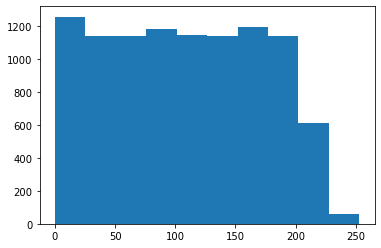

In [31]:
plt.hist(x=df['Tool wear [min]'])

In [32]:
df['Air temperature [K]'].mean(),df['Air temperature [K]'].median(),df['Air temperature [K]'].skew()

(300.00492999999875, 300.1, 0.11427392052155042)

In [33]:
df['Process temperature [K]'].mean(),df['Process temperature [K]'].median(),df['Process temperature [K]'].skew()

(310.00555999999995, 310.1, 0.015027267769228572)

In [34]:
df['Rotational speed [rpm]'].mean(),df['Rotational speed [rpm]'].median(),df['Rotational speed [rpm]'].skew()

(1538.7761, 1503.0, 1.9931710047137523)

In [35]:
df['Torque [Nm]'].mean(),df['Torque [Nm]'].median(),df['Torque [Nm]'].skew()

(39.986909999999995, 40.1, -0.00951659584005855)

In [36]:
df['Tool wear [min]'].mean(),df['Tool wear [min]'].median(),df['Tool wear [min]'].skew()

(107.951, 108.0, 0.027292239050452527)

In [37]:
####---- from above it is clear that the numerical column are normally distributted 
####---- hense we use Standardscalar for scaling

In [38]:
####---- Feature Engineering

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
label=LabelEncoder()

In [41]:
df['Failure Type_encoded']=label.fit_transform(df['Failure Type'])

In [42]:
df['Failure Type_encoded'].value_counts()

1    9652
0     112
3      95
2      78
5      45
4      18
Name: Failure Type_encoded, dtype: int64

In [43]:
#####-one hot coding to the type column

In [44]:
df=pd.get_dummies(df,columns=['Type'],)
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Failure Type_encoded,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,No Failure,1,0,0,1
1,298.2,308.7,1408,46.3,3,0,No Failure,1,0,1,0
2,298.1,308.5,1498,49.4,5,0,No Failure,1,0,1,0
3,298.2,308.6,1433,39.5,7,0,No Failure,1,0,1,0
4,298.2,308.7,1408,40.0,9,0,No Failure,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,No Failure,1,0,0,1
9996,298.9,308.4,1632,31.8,17,0,No Failure,1,1,0,0
9997,299.0,308.6,1645,33.4,22,0,No Failure,1,0,0,1
9998,299.0,308.7,1408,48.5,25,0,No Failure,1,1,0,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      10000 non-null  float64
 1   Process temperature [K]  10000 non-null  float64
 2   Rotational speed [rpm]   10000 non-null  int64  
 3   Torque [Nm]              10000 non-null  float64
 4   Tool wear [min]          10000 non-null  int64  
 5   Target                   10000 non-null  int64  
 6   Failure Type             10000 non-null  object 
 7   Failure Type_encoded     10000 non-null  int32  
 8   Type_H                   10000 non-null  uint8  
 9   Type_L                   10000 non-null  uint8  
 10  Type_M                   10000 non-null  uint8  
dtypes: float64(3), int32(1), int64(3), object(1), uint8(3)
memory usage: 615.4+ KB


In [46]:
df['Type_L'].value_counts()

1    6000
0    4000
Name: Type_L, dtype: int64

In [47]:
X = df.drop(['Failure Type','Target','Failure Type_encoded'], axis=1)
y = df['Failure Type_encoded']

In [48]:
X

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,1,0
2,298.1,308.5,1498,49.4,5,0,1,0
3,298.2,308.6,1433,39.5,7,0,1,0
4,298.2,308.7,1408,40.0,9,0,1,0
...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,1
9996,298.9,308.4,1632,31.8,17,1,0,0
9997,299.0,308.6,1645,33.4,22,0,0,1
9998,299.0,308.7,1408,48.5,25,1,0,0


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
from imblearn.combine import SMOTETomek

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, )

In [52]:
smt=SMOTETomek()

In [53]:
X_trainresampled, y_trainresampled = smt.fit_resample(X_train, y_train)

In [54]:
# Convert the resampled dataset to a DataFrame
df_resampled = pd.DataFrame(X_trainresampled, columns=[f'feature_{i}' for i in range(X_trainresampled.shape[1])])
df_resampled['Failure Type_encoded'] = y_trainresampled

In [55]:
from sklearn.preprocessing import StandardScaler

# Scale the data after SMOTETomek
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_trainresampled)
X_test_scaled = scaler.transform(X_test)

In [56]:
X_train_scaled.shape,X_test_scaled.shape

((46262, 8), (2000, 8))

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score
from sklearn.model_selection import cross_val_score

In [58]:
rfc = RandomForestClassifier( criterion='gini')


In [59]:
model_train=rfc.fit(X_train_scaled, y_trainresampled)

In [60]:
pred=model_train.predict(X_train_scaled)
pred

array([1, 1, 1, ..., 5, 5, 5])

In [61]:
cf=confusion_matrix(y_trainresampled,pred)
cf

array([[7716,    0,    0,    0,    0,    0],
       [   0, 7689,    0,    0,    0,    0],
       [   0,    0, 7721,    0,    0,    0],
       [   0,    0,    0, 7709,    0,    0],
       [   0,    0,    0,    0, 7710,    0],
       [   0,    0,    0,    0,    0, 7717]], dtype=int64)

In [62]:
scores=cross_val_score(rfc,X_train_scaled,y_trainresampled,)
scores

array([0.9943802 , 0.9943802 , 0.99416342, 0.99513619, 0.99427151])

In [63]:
accuracy_score=accuracy_score(y_trainresampled,pred)
accuracy_score

1.0

In [64]:
scores.mean()

0.9944663043579327

In [65]:
scores.std()

0.00034445659763041996

In [66]:
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Failure Type_encoded,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,No Failure,1,0,0,1
1,298.2,308.7,1408,46.3,3,0,No Failure,1,0,1,0
2,298.1,308.5,1498,49.4,5,0,No Failure,1,0,1,0
3,298.2,308.6,1433,39.5,7,0,No Failure,1,0,1,0
4,298.2,308.7,1408,40.0,9,0,No Failure,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,No Failure,1,0,0,1
9996,298.9,308.4,1632,31.8,17,0,No Failure,1,1,0,0
9997,299.0,308.6,1645,33.4,22,0,No Failure,1,0,0,1
9998,299.0,308.7,1408,48.5,25,0,No Failure,1,1,0,0
